## Titanic - Machine Learning from Disaster

### Competition

### Data Set

(1) train.csv¶

train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). To investigate this data, click on the name of the file on the left of the screen. Once you've done this, you can view all of the data in the window.

The values in the second column ("Survived") can be used to determine whether each passenger survived or not:

if it's a "1", the passenger survived.

if it's a "0", the passenger died.

For instance, the first passenger listed in train.csv is Mr. Owen Harris Braund. He was 22 years old when he died on the Titanic.

(2) test.csv

Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived.

Click on test.csv (on the left of the screen) to examine its contents. Note that test.csv does not have a "Survived" column - this information is hidden from you, and how well you do at predicting these hidden values will determine how highly you score in the competition!

(3) gender_submission.csv

The gender_submission.csv file is provided as an example that shows how you should structure your predictions. It predicts that all female passengers survived, and all male passengers died. Your hypotheses regarding survival will probably be different, which will lead to a different submission file. But, just like this file, your submission should have:

a "PassengerId" column containing the IDs of each passenger from test.csv.

a "Survived" column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

In [2]:
train_data = pd.read_csv("titanic_train.csv")
test_data = pd.read_csv("titanic_test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA + Feature Engineering

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


- survival  |	Survival    |	0 = No, 1 = Yes
- pclass    |	Ticket Class    |	1 = 1st, 2 = 2nd, 3 = 3rd
- sex   |	Sex	
- Age   |	Age in Years	
- sibsp |	# of siblings / spouses aboard the Titanic	
- parch |	# of parents / children aboard the Titanic	
- ticket    |	Ticket Number	
- fare  |	Passenger Fare	
- cabin |	Cabin Number	
- embarked  |	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train_data['Sex'] = train_data['Sex'].astype('string')
test_data['Sex'] = test_data['Sex'].astype('string')

#### Missing Values

Text(0.5, 0, 'Age')

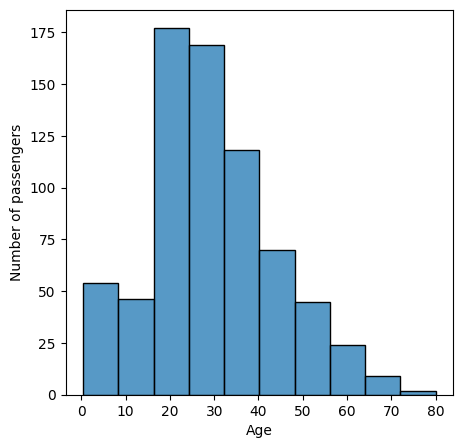

In [6]:
# Age 
# Continuous variable
# First, we will check the distribution of age variable
# Plot the distribution of age to find out if they are Gaussian or skewed
plt.figure(figsize=(5,5))
fig = sns.histplot(data=train_data, x="Age", bins=10);
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

Text(0.5, 0, 'Age')

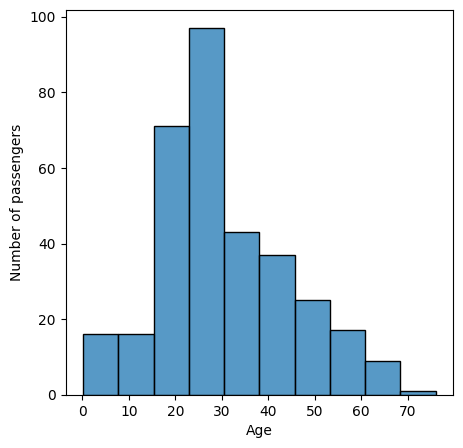

In [7]:
plt.figure(figsize=(5,5))
fig = sns.histplot(data=test_data, x="Age", bins=10);
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

In [8]:
# We can see that the Age distribution is skewed 
# So, we will use the median imputation
median_train = train_data.Age.median()
median_test = test_data.Age.median()
train_data['Age'].fillna(median_train, inplace=True)
test_data['Age'].fillna(median_test, inplace=True)

In [9]:
train_data['Age'] = train_data['Age'].astype('int64')
test_data['Age'] = test_data['Age'].astype('int64')

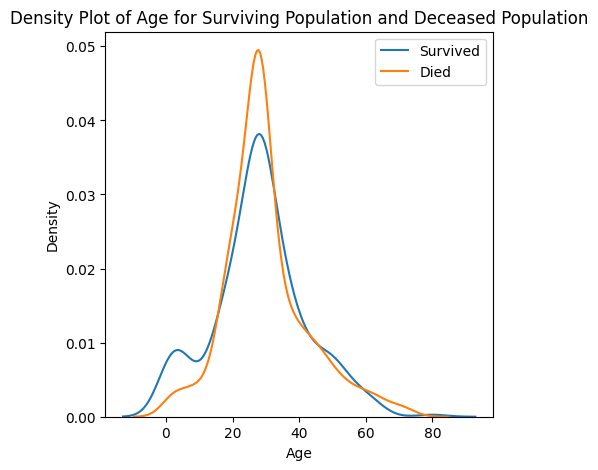

In [10]:
# Exploration of Age
plt.figure(figsize=(5,5))
sns.kdeplot(train_data["Age"][train_data["Survived"] == 1])
sns.kdeplot(train_data["Age"][train_data["Survived"] == 0])
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

In [11]:
train_data['Child']=np.where(train_data['Age']<=16, 1, 0)
test_data['Child']=np.where(test_data['Age']<=16, 1, 0)

In [12]:
# Impute missing values in Cabin
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
test_data['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [14]:
train_data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [15]:
test_data['Cabin'].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [16]:
train_data['Cabin'].fillna("NA", inplace=True)
test_data['Cabin'].fillna("NA", inplace=True)

In [17]:
train_data['Deck'] = train_data['Cabin'].str.slice(0, 1)
test_data['Deck'] = test_data['Cabin'].str.slice(0, 1)

In [18]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [19]:
# Impute missing values in Embarked
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
train_data['Embarked'].fillna("S", inplace=True)

Text(0.5, 0, 'Fare')

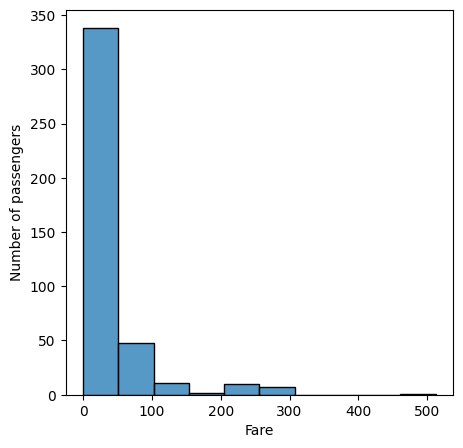

In [22]:
# Fare
# Continuous variable
# First, we will check the distribution of Fare variable
# Plot the distribution of age to find out if they are Gaussian or skewed
plt.figure(figsize=(5,5))
fig = sns.histplot(data=test_data, x="Fare", bins=10);
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

In [23]:
test_data['Fare'].fillna(0, inplace=True)

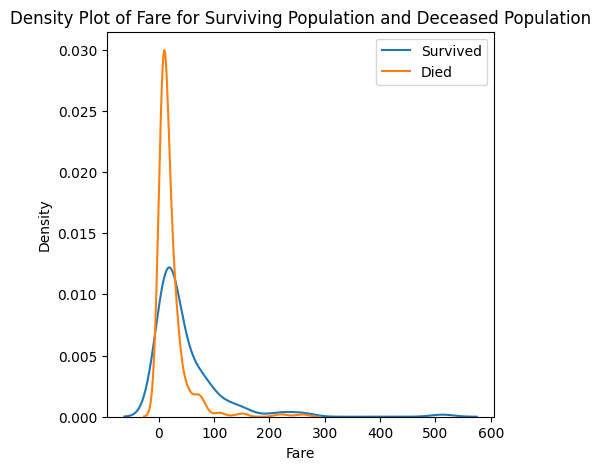

In [24]:
# Exploration of Fare

plt.figure(figsize=(5,5))
sns.kdeplot(train_data["Fare"][train_data.Survived == 1])
sns.kdeplot(train_data["Fare"][train_data.Survived == 0])
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next.

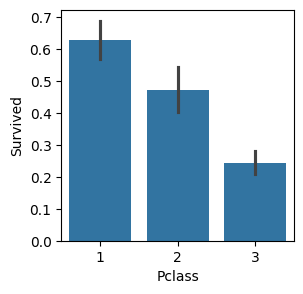

In [25]:
# Exploration of Passenger Class

plt.figure(figsize=(3,3))
sns.barplot(train_data, x='Pclass', y='Survived')
plt.show()

Unsurprisingly, being a first class passenger was safest.

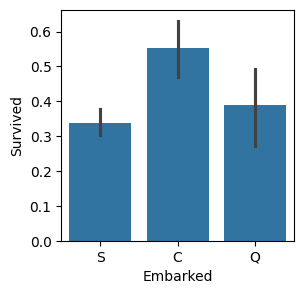

In [26]:
#Exploration of Embarked Port

plt.figure(figsize=(3,3))
sns.barplot(train_data, x='Embarked', y='Survived')
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).

It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

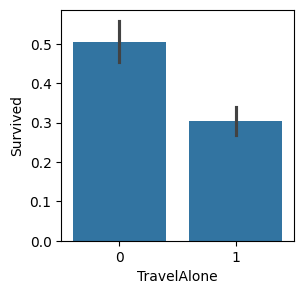

In [27]:
# Exploration of Traveling Alone vs. With Family

train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

plt.figure(figsize=(3,3))
sns.barplot(train_data, x='TravelAlone', y='Survived')
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.


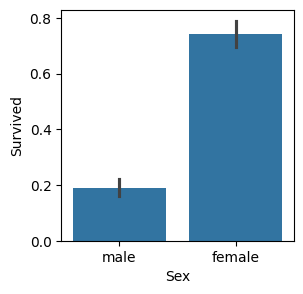

In [28]:
# Exploration of Gender Variable

plt.figure(figsize=(3,3))
sns.barplot(train_data, x='Sex', y='Survived')
plt.show()

This is a very obvious difference. Clearly being female greatly increased your chances of survival.

#### Categorical Data - Encoding

In [29]:
train_data = pd.get_dummies(train_data, columns = ['Pclass', 'Sex', 'Embarked', 'Deck'])
test_data = pd.get_dummies(test_data, columns = ['Pclass', 'Sex', 'Embarked', 'Deck'])

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Child        891 non-null    int64  
 9   TravelAlone  891 non-null    int64  
 10  Pclass_1     891 non-null    bool   
 11  Pclass_2     891 non-null    bool   
 12  Pclass_3     891 non-null    bool   
 13  Sex_female   891 non-null    boolean
 14  Sex_male     891 non-null    boolean
 15  Embarked_C   891 non-null    bool   
 16  Embarked_Q   891 non-null    bool   
 17  Embarked_S   891 non-null    bool   
 18  Deck_A       891 non-null    bool   
 19  Deck_B  

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Age          418 non-null    int64  
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Ticket       418 non-null    object 
 6   Fare         418 non-null    float64
 7   Child        418 non-null    int64  
 8   TravelAlone  418 non-null    int64  
 9   Pclass_1     418 non-null    bool   
 10  Pclass_2     418 non-null    bool   
 11  Pclass_3     418 non-null    bool   
 12  Sex_female   418 non-null    boolean
 13  Sex_male     418 non-null    boolean
 14  Embarked_C   418 non-null    bool   
 15  Embarked_Q   418 non-null    bool   
 16  Embarked_S   418 non-null    bool   
 17  Deck_A       418 non-null    bool   
 18  Deck_B       418 non-null    bool   
 19  Deck_C  

In [32]:
train_data = train_data.drop(['Deck_N','Deck_T'], axis=1)
test_data = test_data.drop(['Deck_N'], axis=1)

In [33]:
train_data['Pclass_1'] = train_data['Pclass_1'].astype('int64')
train_data['Pclass_2'] = train_data['Pclass_2'].astype('int64')
train_data['Pclass_3'] = train_data['Pclass_3'].astype('int64')
train_data['Sex_female'] = train_data['Sex_female'].astype('int64')
train_data['Sex_male'] = train_data['Sex_male'].astype('int64')
train_data['Embarked_C'] = train_data['Embarked_C'].astype('int64')
train_data['Embarked_Q'] = train_data['Embarked_Q'].astype('int64')
train_data['Embarked_S'] = train_data['Embarked_S'].astype('int64')
train_data['Deck_A'] = train_data['Deck_A'].astype('int64')
train_data['Deck_B'] = train_data['Deck_B'].astype('int64')
train_data['Deck_C'] = train_data['Deck_C'].astype('int64')
train_data['Deck_D'] = train_data['Deck_D'].astype('int64')
train_data['Deck_E'] = train_data['Deck_E'].astype('int64')
train_data['Deck_F'] = train_data['Deck_F'].astype('int64')
train_data['Deck_G'] = train_data['Deck_G'].astype('int64')

In [34]:
test_data['Pclass_1'] = test_data['Pclass_1'].astype('int64')
test_data['Pclass_2'] = test_data['Pclass_2'].astype('int64')
test_data['Pclass_3'] = test_data['Pclass_3'].astype('int64')
test_data['Sex_female'] = test_data['Sex_female'].astype('int64')
test_data['Sex_male'] = test_data['Sex_male'].astype('int64')
test_data['Embarked_C'] = test_data['Embarked_C'].astype('int64')
test_data['Embarked_Q'] = test_data['Embarked_Q'].astype('int64')
test_data['Embarked_S'] = test_data['Embarked_S'].astype('int64')
test_data['Deck_A'] = test_data['Deck_A'].astype('int64')
test_data['Deck_B'] = test_data['Deck_B'].astype('int64')
test_data['Deck_C'] = test_data['Deck_C'].astype('int64')
test_data['Deck_D'] = test_data['Deck_D'].astype('int64')
test_data['Deck_E'] = test_data['Deck_E'].astype('int64')
test_data['Deck_F'] = test_data['Deck_F'].astype('int64')
test_data['Deck_G'] = test_data['Deck_G'].astype('int64')

#### Outlier Engineering

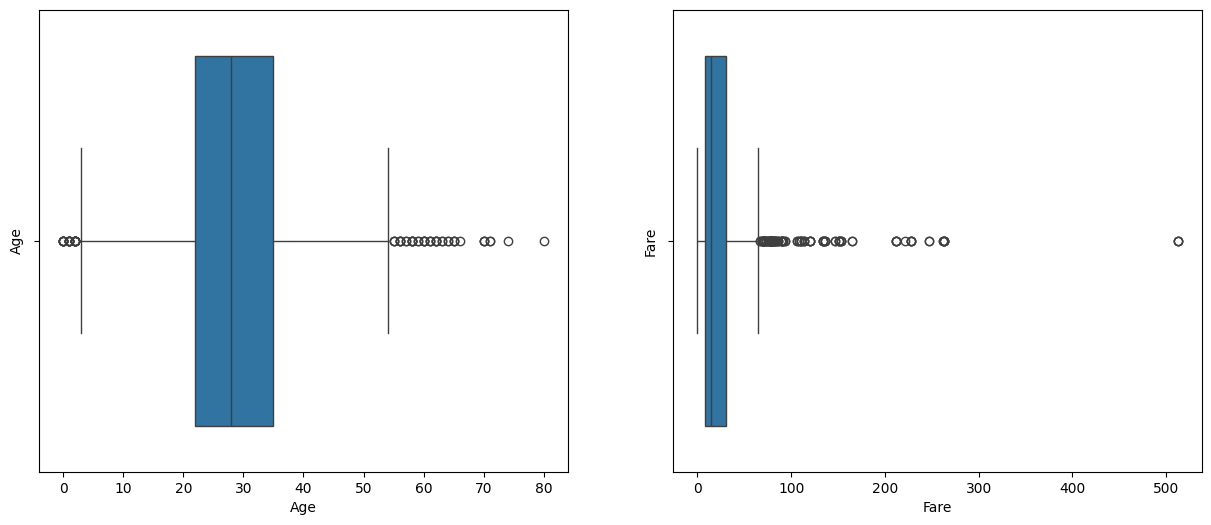

In [35]:
# let's make boxplots to visualise outliers in the continuous variables 
# Age and Fare

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(train_data, x='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = sns.boxplot(train_data, x='Fare')
fig.set_title('')
fig.set_ylabel('Fare')
plt.show()

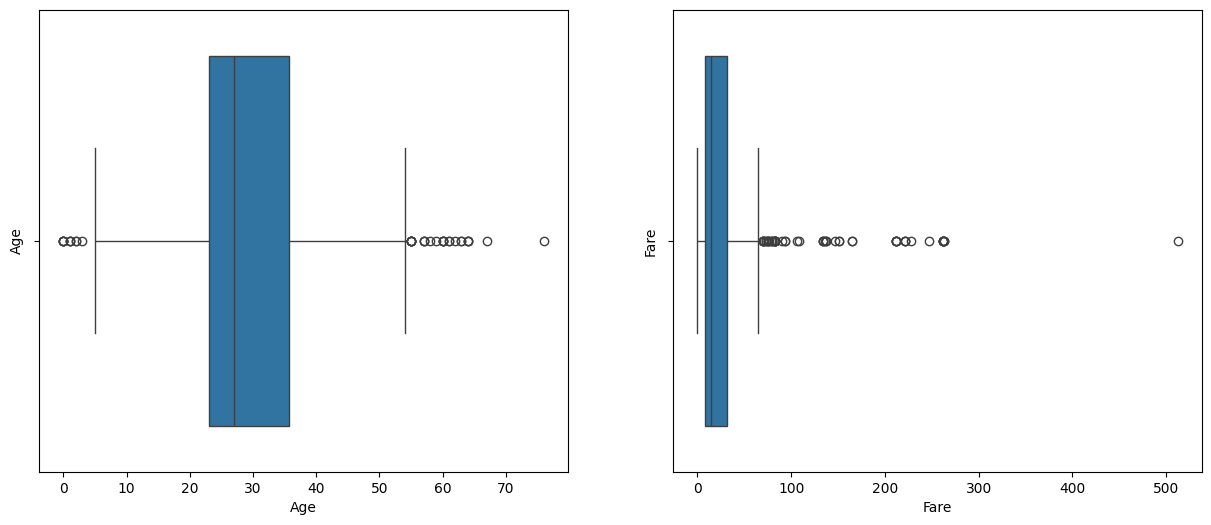

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(test_data, x='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = sns.boxplot(test_data, x='Fare')
fig.set_title('')
fig.set_ylabel('Fare')
plt.show()

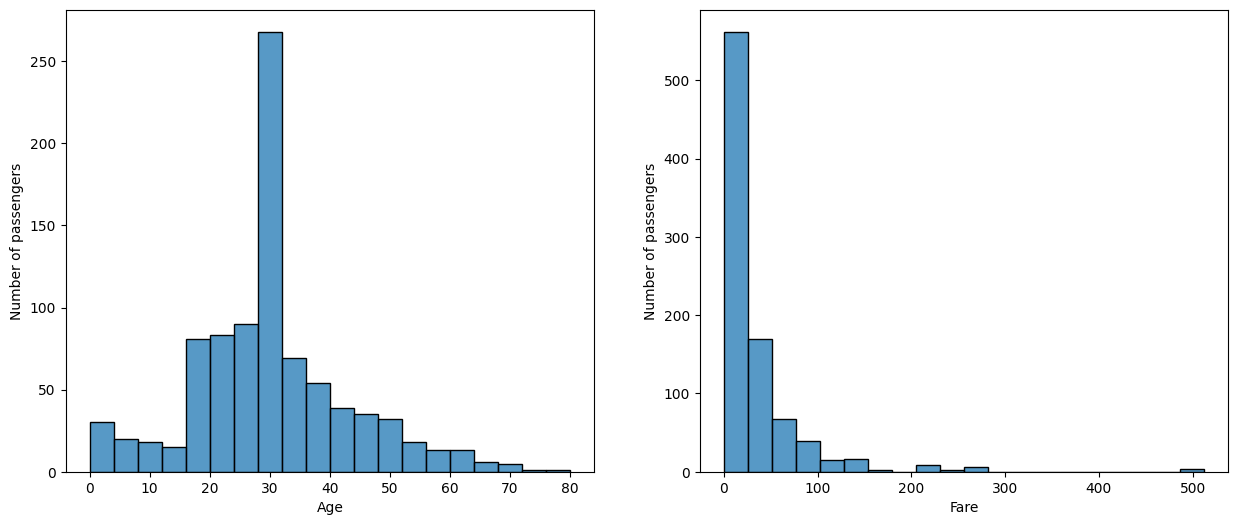

In [37]:
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.histplot(train_data, x='Age', bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = sns.histplot(train_data, x='Fare', bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')
plt.show()

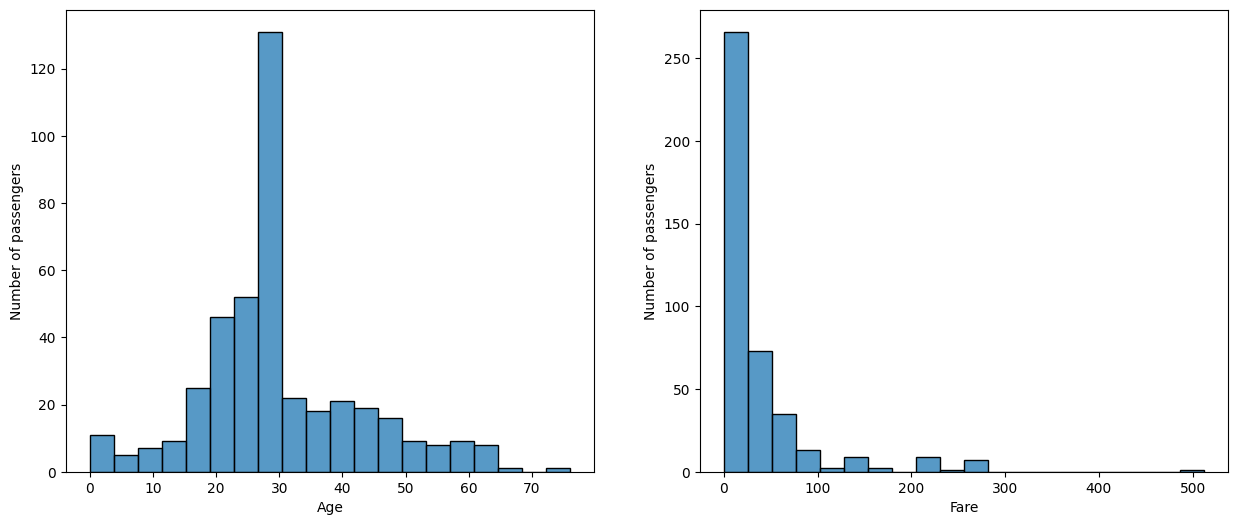

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.histplot(test_data, x='Age', bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = sns.histplot(test_data, x='Fare', bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')
plt.show()

In [39]:
# train_data find outliers

# Age
Upper_boundary = train_data.Age.mean() + 3* train_data.Age.std()
Lower_boundary = train_data.Age.mean() - 3* train_data.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = train_data.Fare.quantile(0.75) - train_data.Fare.quantile(0.25)
Lower_fence = train_data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = train_data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Age outliers are values < -9.738956576030407 or > 68.43031460072177
Fare outliers are values < -61.358399999999996 or > 100.2688


In [40]:
# view the statistical summary of Age
train_data.Age.describe()

count    891.000000
mean      29.345679
std       13.028212
min        0.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
# top-coding the Age variable
train_data.loc[train_data.Age>73, 'Age'] = 73
train_data.Age.max()

73

In [42]:
# view statistical properties of Fare
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [43]:
# top-coding: capping the variable Fare at 100
train_data.loc[train_data.Fare>100, 'Fare'] = 100
train_data.Fare.max()

100.0

In [44]:
# test_data find outliers

# Age
Upper_boundary = test_data.Age.mean() + 3* test_data.Age.std()
Lower_boundary = test_data.Age.mean() - 3* test_data.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = test_data.Fare.quantile(0.75) - test_data.Fare.quantile(0.25)
Lower_fence = test_data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = test_data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Age outliers are values < -8.590437558239639 or > 67.73876291709131
Fare outliers are values < -62.83242499999999 or > 102.20009999999999


In [45]:
test_data.Age.describe()

count    418.000000
mean      29.574163
std       12.721533
min        0.000000
25%       23.000000
50%       27.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [46]:
# top-coding the Age variable
test_data.loc[train_data.Age>67, 'Age'] = 67
test_data.Age.max()

67

In [47]:
test_data.Fare.describe()

count    418.000000
mean      35.541956
std       55.867684
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [48]:
test_data.loc[test_data.Fare>102, 'Fare'] = 102
test_data.Fare.max()

102.0

In [49]:
train_data_final = train_data.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)
test_data_final = test_data.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)

### Logistic Regression

In [50]:
train_y = train_data_final['Survived']
train_data_final = train_data_final.drop(['Survived'], axis=1)

In [51]:
train_data_final.head()

,Age,Fare,Child,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
0,22,7.2500,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
1,38,71.2833,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2,26,7.9250,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
3,35,53.1000,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,35,8.0500,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0


In [57]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [58]:
X_train, X_test, y_train, y_test = train_test_split(train_data_final, train_y, test_size=0.2, random_state=2)

Train/Test split results:
Accuracy is 0.799
Logarithmic loss is 0.503
The Area Under the ROC (AUC) curve is 0.836


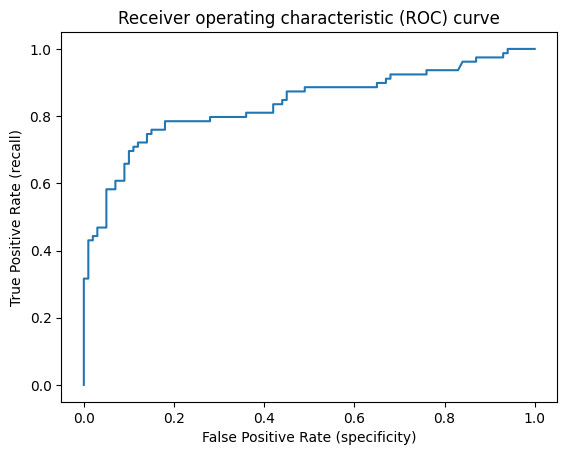

In [59]:
# Model evaluation based on simple train/test split using train_test_split() function

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print("Accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print("Logarithmic loss is %2.3f" % log_loss(y_test, y_pred_proba))
print("The Area Under the ROC (AUC) curve is %2.3f" % auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.title('Receiver operating characteristic (ROC) curve')
plt.show()


In [60]:
# Model evaluation based on K-fold cross-validation using cross_val_score() function

logreg = LogisticRegression()
scores_accuracy = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X_train, y_train, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print("Average Accuracy is %2.3f" % scores_accuracy.mean())
print("Average Logarithmic Loss is %2.3f" % -scores_log_loss.mean())
print("The Average Area Under the ROC (AUC) Curve is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
Average Accuracy is 0.816
Average Logarithmic Loss is 0.446
The Average Area Under the ROC (AUC) Curve is 0.854


In [64]:
# Model hyperparameter tuning with GridSearchCV

parameters = {"C": [0.001, 0.01, 0.1, 1.], "penalty": ["l1", "l2"]}
logreg = LogisticRegression()

model_logreg = GridSearchCV(logreg, parameters, cv=10, scoring='accuracy')
model_logreg.fit(X_train, y_train)

print('Hyperparameter tuning with GridSearchCV')
print(f'Best parameters {model_logreg.best_params_}')

print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_logreg.best_score_:.3f}'
)


Hyperparameter tuning with GridSearchCV
Best parameters {'C': 1.0, 'penalty': 'l2'}
Mean cross-validated accuracy score of the best_estimator: 0.816


In [73]:
predictions = model_logreg.predict(test_data_final)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
